In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('train.csv')
dft=pd.read_csv('test.csv')

In [4]:
df.tail()

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
6333,Y7U717HO87PCW6XXIQA1,Female,Yes,No,No,3,Yes,Wifi Broadband,No,Yes,No,Yes,Card,100.391595,441.914530,Yes
6334,NGY3WOQ0OT1P4RHAR0PT,Female,Yes,No,No,-1,Yes,Satellite Broadband,No,No,No,Yes,Bank,44.782165,45.308180,No
6335,ZBBW7H8AYLZJ2HK5TBBJ,Male,No,No,Yes,18,Yes,No,No,No,No,No,Electronic,35.941713,552.181341,Yes
6336,BUE75NSSLT2S2URTKZRN,Male,No,Yes,No,46,Yes,No,No,No,No,Yes,Card,94.762984,4563.812326,No
6337,IRFAYIAO820RIX2GUFFF,Female,No,No,No,60,Yes,Satellite Broadband,No,No,No,No,Bank,94.337343,5756.542013,No


In [5]:
data=df.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6338 non-null   object 
 1   sex                  6338 non-null   object 
 2   Aged                 6338 non-null   object 
 3   Married              6338 non-null   object 
 4   TotalDependents      6338 non-null   object 
 5   ServiceSpan          6338 non-null   int64  
 6   MobileService        6338 non-null   object 
 7   4GService            6338 non-null   object 
 8   CyberProtection      6338 non-null   object 
 9   HardwareSupport      6338 non-null   object 
 10  TechnicalAssistance  6338 non-null   object 
 11  FilmSubscription     6338 non-null   object 
 12  SettlementProcess    6338 non-null   object 
 13  QuarterlyPayment     6338 non-null   float64
 14  GrandPayment         6328 non-null   float64
 15  CustomerAttrition    6338 non-null   o

In [7]:
df.groupby('sex')['CustomerAttrition'].value_counts()

sex     CustomerAttrition
Female  No                   2241
        Yes                   884
Male    No                   2417
        Yes                   796
Name: CustomerAttrition, dtype: int64

In [8]:
df.groupby('Aged')['CustomerAttrition'].value_counts()

Aged  CustomerAttrition
No    No                   4051
      Yes                  1258
Yes   No                    607
      Yes                   422
Name: CustomerAttrition, dtype: int64

In [9]:
df.groupby(['Aged','sex'])['CustomerAttrition'].value_counts()

Aged  sex     CustomerAttrition
No    Female  No                   1955
              Yes                   675
      Male    No                   2096
              Yes                   583
Yes   Female  No                    286
              Yes                   209
      Male    No                    321
              Yes                   213
Name: CustomerAttrition, dtype: int64

In [10]:
df.describe()

,ServiceSpan,QuarterlyPayment,GrandPayment
count,6338.000000,6338.000000,6328.000000
mean,31.946040,64.814490,2290.544207
std,24.559659,30.191091,2265.181098
min,-2.000000,16.504109,16.297961
25%,8.000000,35.645524,401.849530
50%,29.000000,70.534085,1407.589119
75%,55.000000,90.058498,3823.855846
max,73.000000,120.159190,8685.848657


<AxesSubplot:xlabel='ServiceSpan'>

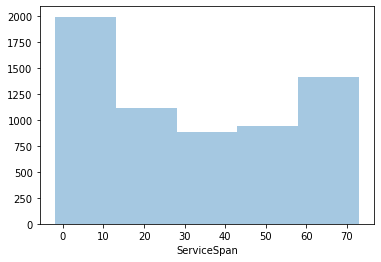

In [11]:
sns.distplot(df['ServiceSpan'],norm_hist=False,kde=False,bins=5)

In [12]:
df['CustomerAttrition'].value_counts()

No     4658
Yes    1680
Name: CustomerAttrition, dtype: int64

In [13]:
df[df['ServiceSpan']<0]['CustomerAttrition'].value_counts()

Yes    88
No     48
Name: CustomerAttrition, dtype: int64

In [14]:
df[df['ServiceSpan'].between(-2,13,inclusive=False)]['ServiceSpan'].count()

1992

In [15]:
df['isneg']=np.where(df['ServiceSpan']<0,1,0)

df['ServiceSpan'].replace([-1,-2],[1,2],inplace=True)

In [16]:
df[df['ServiceSpan'].between(0,15,inclusive=True)]['ServiceSpan'].count()

2110

<AxesSubplot:xlabel='ServiceSpan'>

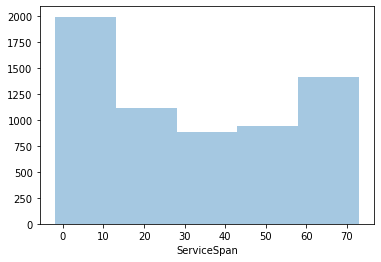

In [17]:
sns.distplot(df['ServiceSpan'],norm_hist=False,kde=False,bins=5)

In [18]:
df['0-13']=(df['ServiceSpan'].between(0,13,inclusive=True)).map({True:1,False:0})
df['13-28']=(df['ServiceSpan'].between(13,28,inclusive=False)).map({True:1,False:0})
df['28-43']=(df['ServiceSpan'].between(28,43,inclusive=True)).map({True:1,False:0})
df['43-58']=(df['ServiceSpan'].between(43,58,inclusive=False)).map({True:1,False:0})
df['58-73']=(df['ServiceSpan'].between(58,73,inclusive=True)).map({True:1,False:0})

In [19]:
df.groupby('MobileService')['CustomerAttrition'].value_counts()

MobileService  CustomerAttrition
No             No                    440
               Yes                   126
Yes            No                   4218
               Yes                  1554
Name: CustomerAttrition, dtype: int64

In [20]:
df.groupby('4GService')['CustomerAttrition'].value_counts()

4GService            CustomerAttrition
No                   No                   1005
                     Yes                   362
Satellite Broadband  No                   1597
                     Yes                   580
Wifi Broadband       No                   2056
                     Yes                   738
Name: CustomerAttrition, dtype: int64

In [21]:
df.groupby('Aged')['MobileService'].value_counts()

Aged  MobileService
No    Yes              4815
      No                494
Yes   Yes               957
      No                 72
Name: MobileService, dtype: int64

In [22]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [23]:
df.head()

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition,isneg,0-13,13-28,28-43,43-58,58-73
0,B60LHTZLLPFU4IULNPUF,Female,No,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes,0,0,0,0,1,0
1,1RUJ7ONYZHYTWKOKO1SD,Male,No,Yes,No,45,Yes,Wifi Broadband,No,No,No,Yes,Bank,18.876470,922.085998,No,0,0,0,0,1,0
2,DZ9EEOQWSN0MYCBUPAM5,Male,Yes,Yes,No,59,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129,Yes,0,0,0,0,0,1
3,YZ43L1UQUQACTL1PXXZG,Male,No,No,No,14,Yes,Wifi Broadband,No,No,No,No,Check,80.108839,1248.655391,No,0,0,1,0,0,0
4,6P28152QGF60PDLSCB9M,Female,No,Yes,Yes,25,Yes,Wifi Broadband,No,Yes,No,Yes,Check,51.529773,1285.321277,No,0,0,1,0,0,0


In [24]:
df.groupby('sex')['4GService'].value_counts()

sex     4GService          
Female  Wifi Broadband         1384
        Satellite Broadband    1067
        No                      674
Male    Wifi Broadband         1410
        Satellite Broadband    1110
        No                      693
Name: 4GService, dtype: int64

In [25]:
df.groupby('Aged')['FilmSubscription'].value_counts()

Aged  FilmSubscription
No    No                  3286
      Yes                 2023
Yes   No                   622
      Yes                  407
Name: FilmSubscription, dtype: int64

In [26]:
dum=pd.get_dummies(data=df,columns=['sex','Aged','Married','TotalDependents','MobileService','4GService','CyberProtection','HardwareSupport','TechnicalAssistance','FilmSubscription','SettlementProcess'],drop_first=True)

In [27]:
dum.head()

,ID,ServiceSpan,QuarterlyPayment,GrandPayment,CustomerAttrition,isneg,0-13,13-28,28-43,43-58,58-73,sex_Male,Aged_Yes,Married_Yes,TotalDependents_Yes,MobileService_Yes,4GService_Satellite Broadband,4GService_Wifi Broadband,CyberProtection_Yes,HardwareSupport_Yes,TechnicalAssistance_Yes,FilmSubscription_Yes,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic
0,B60LHTZLLPFU4IULNPUF,48,96.259802,4628.129119,Yes,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1,0,0,1,0
1,1RUJ7ONYZHYTWKOKO1SD,45,18.876470,922.085998,No,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0
2,DZ9EEOQWSN0MYCBUPAM5,59,106.016057,6205.891129,Yes,0,0,0,0,0,1,1,1,1,0,1,0,1,1,0,1,0,1,0,0
3,YZ43L1UQUQACTL1PXXZG,14,80.108839,1248.655391,No,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0
4,6P28152QGF60PDLSCB9M,25,51.529773,1285.321277,No,0,0,1,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0


In [28]:
dum['div']=df['GrandPayment']/df['QuarterlyPayment']

In [29]:
dum.describe()

,ServiceSpan,QuarterlyPayment,GrandPayment,isneg,0-13,13-28,28-43,43-58,58-73,sex_Male,Aged_Yes,Married_Yes,TotalDependents_Yes,MobileService_Yes,4GService_Satellite Broadband,4GService_Wifi Broadband,CyberProtection_Yes,HardwareSupport_Yes,TechnicalAssistance_Yes,FilmSubscription_Yes,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic,div
count,6338.000000,6338.000000,6328.000000,6338.000000,6338.000000,6338.00000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6328.000000
mean,31.946040,64.814490,2290.544207,0.021458,0.307352,0.16125,0.147681,0.139792,0.222468,0.506942,0.162354,0.483591,0.300726,0.910697,0.343484,0.440833,0.288735,0.339697,0.288735,0.383402,0.214737,0.229252,0.336699,32.508336
std,24.559659,30.191091,2265.181098,0.144916,0.461433,0.36779,0.354811,0.346798,0.415936,0.499991,0.368804,0.499770,0.458610,0.285203,0.474909,0.496526,0.453210,0.473644,0.453210,0.486253,0.410672,0.420385,0.472618,24.602215
min,-2.000000,16.504109,16.297961,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.813676
25%,8.000000,35.645524,401.849530,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.883462
50%,29.000000,70.534085,1407.589119,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.142765
75%,55.000000,90.058498,3823.855846,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,55.170455
max,73.000000,120.159190,8685.848657,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,82.298799


In [30]:
df.head()

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition,isneg,0-13,13-28,28-43,43-58,58-73
0,B60LHTZLLPFU4IULNPUF,Female,No,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes,0,0,0,0,1,0
1,1RUJ7ONYZHYTWKOKO1SD,Male,No,Yes,No,45,Yes,Wifi Broadband,No,No,No,Yes,Bank,18.876470,922.085998,No,0,0,0,0,1,0
2,DZ9EEOQWSN0MYCBUPAM5,Male,Yes,Yes,No,59,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129,Yes,0,0,0,0,0,1
3,YZ43L1UQUQACTL1PXXZG,Male,No,No,No,14,Yes,Wifi Broadband,No,No,No,No,Check,80.108839,1248.655391,No,0,0,1,0,0,0
4,6P28152QGF60PDLSCB9M,Female,No,Yes,Yes,25,Yes,Wifi Broadband,No,Yes,No,Yes,Check,51.529773,1285.321277,No,0,0,1,0,0,0


<AxesSubplot:xlabel='div'>

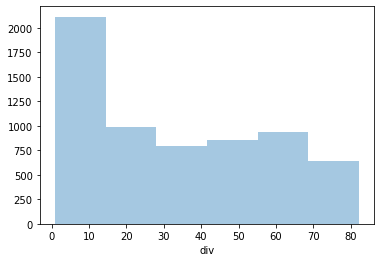

In [31]:
sns.distplot(dum['div'],norm_hist=False,kde=False,bins=6)

<AxesSubplot:xlabel='GrandPayment'>

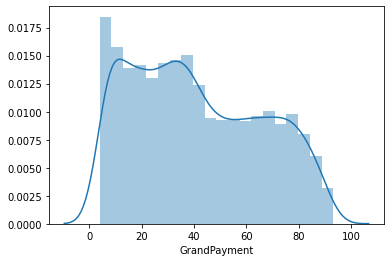

In [32]:
sns.distplot(np.sqrt(df['GrandPayment']))

<AxesSubplot:xlabel='QuarterlyPayment'>

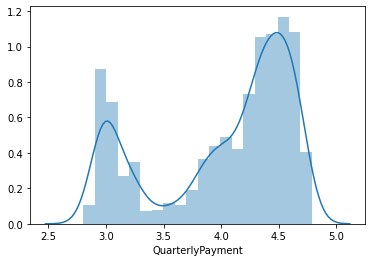

In [33]:
sns.distplot(np.log(df['QuarterlyPayment']))

In [34]:
df.groupby('sex')['GrandPayment'].mean()

sex
Female    2306.347531
Male      2275.164671
Name: GrandPayment, dtype: float64

In [35]:
df.groupby('sex')['QuarterlyPayment'].mean()

sex
Female    65.087393
Male      64.549062
Name: QuarterlyPayment, dtype: float64

In [36]:
df.groupby('TotalDependents')['GrandPayment'].mean()

TotalDependents
No     2190.361754
Yes    2524.725975
Name: GrandPayment, dtype: float64

In [37]:
df.groupby('TotalDependents')['sex'].value_counts()

TotalDependents  sex   
No               Male      2218
                 Female    2214
Yes              Male       995
                 Female     911
Name: sex, dtype: int64

In [38]:
df.groupby('SettlementProcess')['GrandPayment'].mean()

SettlementProcess
Bank          3104.298736
Card          3090.676429
Check         1055.808658
Electronic    2087.033431
Name: GrandPayment, dtype: float64

In [39]:
df.groupby('FilmSubscription')['GrandPayment'].mean()

FilmSubscription
No     2280.956921
Yes    2305.974796
Name: GrandPayment, dtype: float64

In [40]:
dum['div']

0       48.079562
1       48.848434
2       58.537275
3       15.586987
4       24.943274
          ...    
6333     4.401908
6334     1.011746
6335    15.363245
6336    48.160285
6337    61.020820
Name: div, Length: 6338, dtype: float64

<AxesSubplot:xlabel='div'>

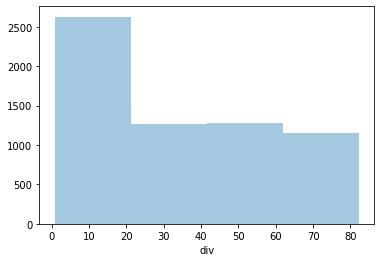

In [41]:
sns.distplot(dum['div'],norm_hist=False,kde=False,bins=4)

<AxesSubplot:xlabel='GrandPayment'>

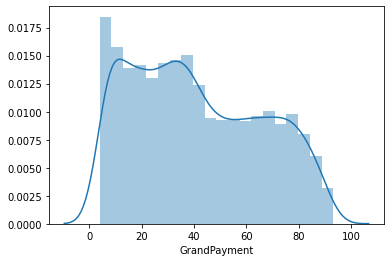

In [42]:
sns.distplot(np.sqrt(dum['GrandPayment']))

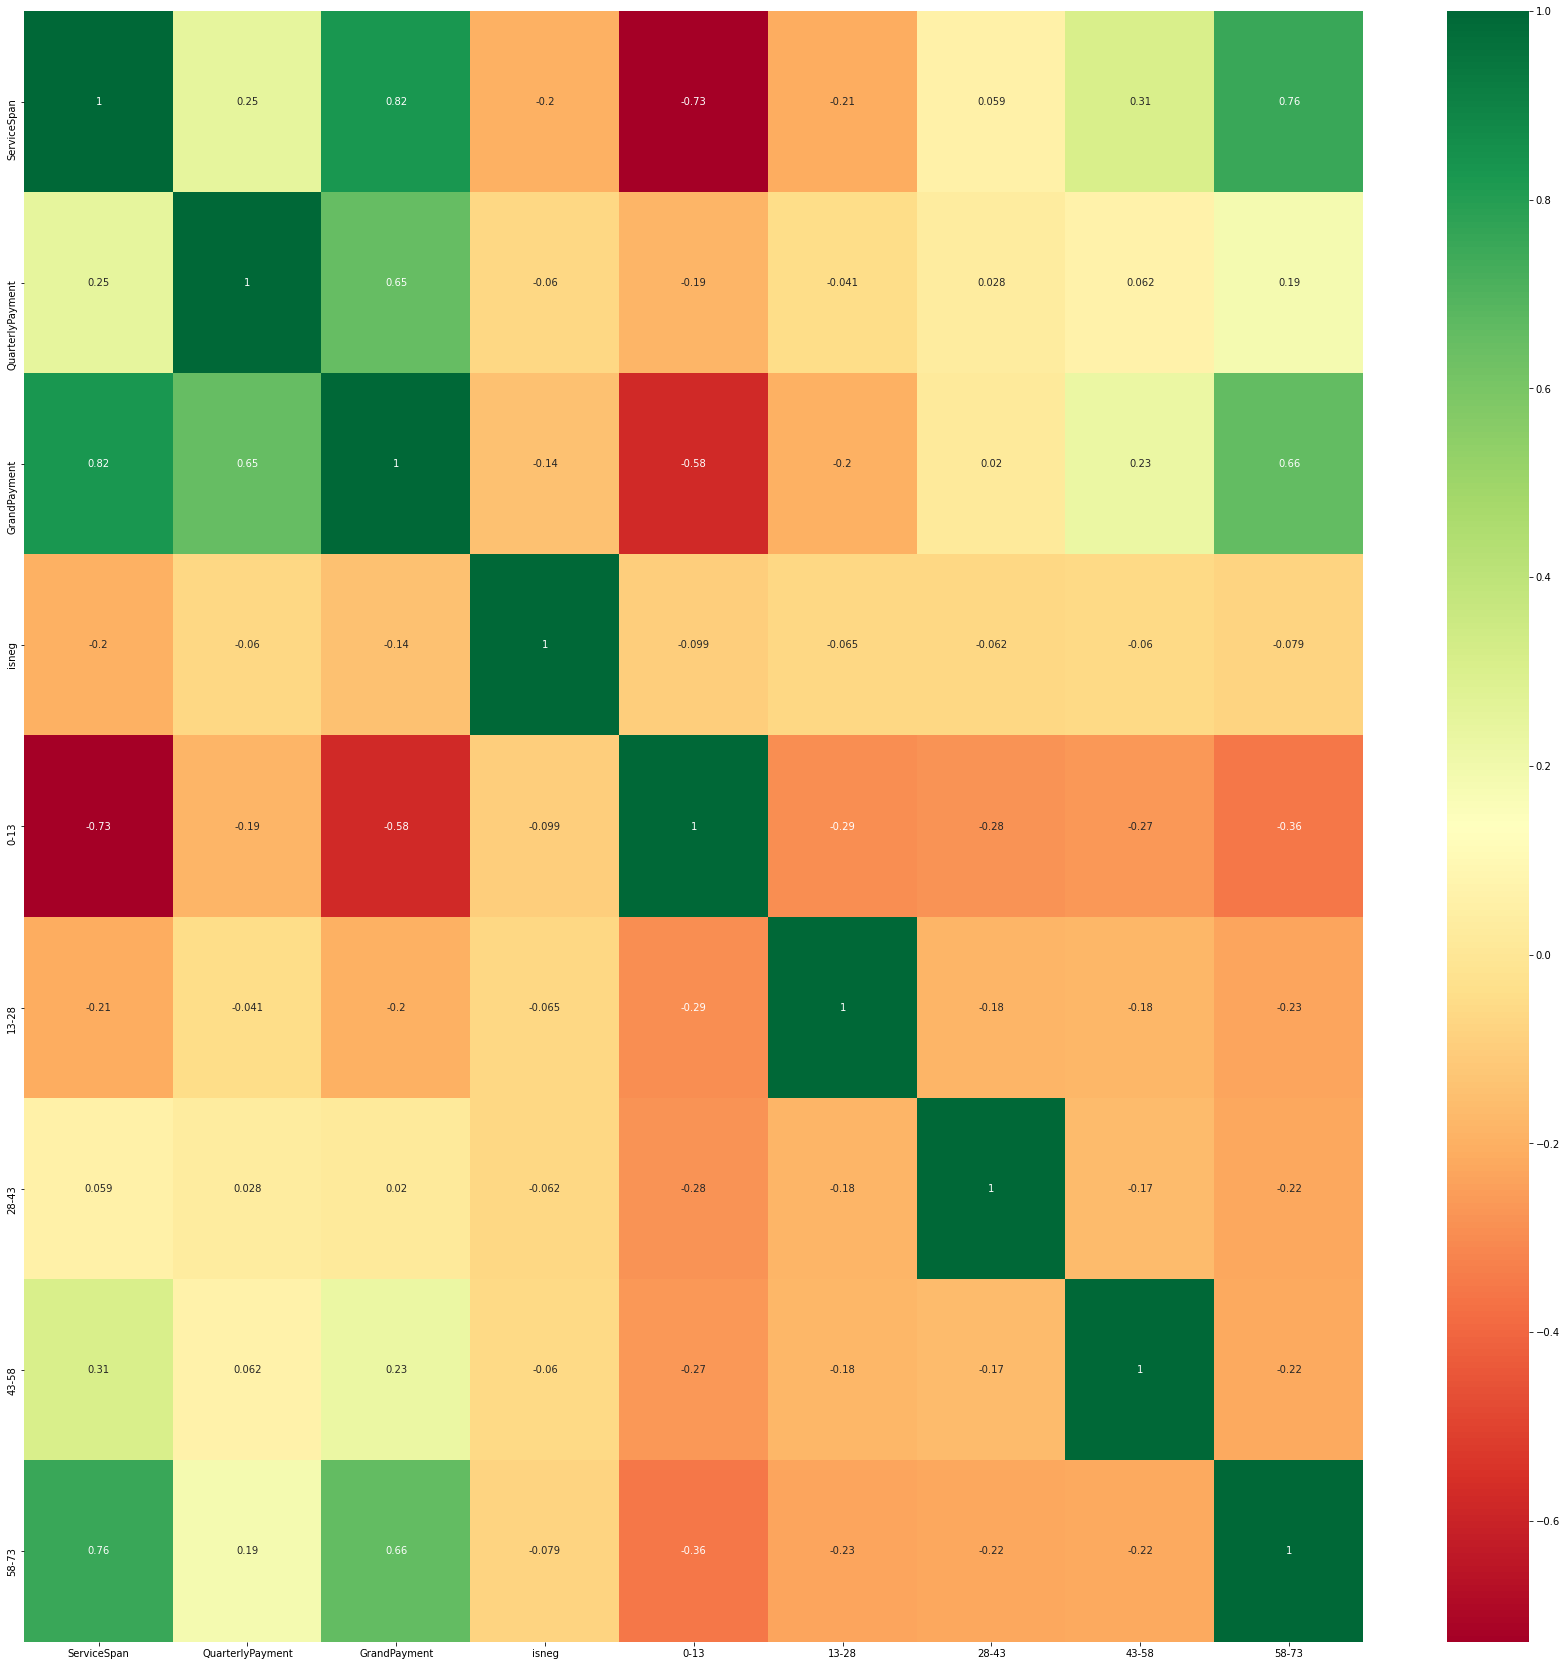

In [43]:
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [44]:
df.groupby('58-73')['GrandPayment'].mean()

58-73
0    1493.945797
1    5069.034265
Name: GrandPayment, dtype: float64

In [45]:
df.groupby('43-58')['GrandPayment'].mean()

43-58
0    2084.224768
1    3557.801979
Name: GrandPayment, dtype: float64

In [46]:
df.groupby('0-13')['GrandPayment'].mean()

0-13
0    3159.967015
1     325.496366
Name: GrandPayment, dtype: float64

In [47]:
df[df['GrandPayment'].isnull()]

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition,isneg,0-13,13-28,28-43,43-58,58-73
643,WM9BC6CU0ZI1B7WDPZ6G,Female,No,Yes,Yes,1,Yes,No,No,No,No,Yes,Check,24.055624,NaN,No,0,1,0,0,0,0
1169,41E4MSKS139ATWAHUWS5,Male,No,Yes,Yes,1,Yes,Wifi Broadband,No,Yes,Yes,Yes,Check,73.051308,NaN,No,0,1,0,0,0,0
1186,LZMNTZPKWEM8IAOSPSTQ,Female,No,Yes,Yes,-1,Yes,Satellite Broadband,Yes,Yes,No,No,Check,80.233357,NaN,No,1,0,0,0,0,0
2281,N3OCBW4F5ADT1GNDI1K8,Female,No,Yes,Yes,1,Yes,No,No,No,No,No,Check,20.607275,NaN,No,0,1,0,0,0,0
3611,IS6FHA32W1KEETF478HC,Male,No,Yes,Yes,-1,Yes,Satellite Broadband,No,No,No,No,Check,26.212375,NaN,No,1,0,0,0,0,0
3918,S661RZU0I205HLT4G6DD,Male,No,Yes,Yes,0,Yes,Satellite Broadband,No,No,No,Yes,Check,19.918643,NaN,No,0,1,0,0,0,0
5579,Z5G1GX5IS15OMT9HRYJU,Male,No,Yes,Yes,0,Yes,Wifi Broadband,Yes,Yes,Yes,No,Bank,51.669205,NaN,No,0,1,0,0,0,0
5742,QEQYQ949C4H8J47LT3W4,Female,No,Yes,Yes,-2,Yes,Wifi Broadband,Yes,Yes,Yes,No,Card,56.157994,NaN,No,1,0,0,0,0,0
5796,P7UZJPSJDE0QKU1L3MIP,Male,No,Yes,Yes,1,Yes,Satellite Broadband,No,No,No,Yes,Check,20.075335,NaN,No,0,1,0,0,0,0
6203,SGAKX7STDIYEMP82AMFY,Male,No,No,Yes,1,Yes,Satellite Broadband,No,No,No,Yes,Check,20.687134,NaN,No,0,1,0,0,0,0


In [48]:
dum['GrandPayment'].fillna(df.groupby('0-13')['GrandPayment'].transform('mean'),inplace=True)

In [49]:
dum['div']=dum['GrandPayment']/dum['QuarterlyPayment']

<AxesSubplot:xlabel='div'>

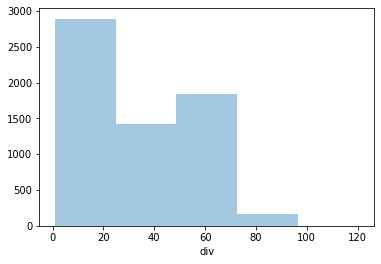

In [50]:
sns.distplot(dum['div'],norm_hist=False,kde=False,bins=5)

In [51]:
dum['div_0-20']=(dum['div'].between(0,20,inclusive=True)).map({True:1,False:0})

In [52]:
dum.head()

,ID,ServiceSpan,QuarterlyPayment,GrandPayment,CustomerAttrition,isneg,0-13,13-28,28-43,43-58,58-73,sex_Male,Aged_Yes,Married_Yes,TotalDependents_Yes,MobileService_Yes,4GService_Satellite Broadband,4GService_Wifi Broadband,CyberProtection_Yes,HardwareSupport_Yes,TechnicalAssistance_Yes,FilmSubscription_Yes,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic,div,div_0-20
0,B60LHTZLLPFU4IULNPUF,48,96.259802,4628.129119,Yes,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1,0,0,1,0,48.079562,0
1,1RUJ7ONYZHYTWKOKO1SD,45,18.876470,922.085998,No,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,48.848434,0
2,DZ9EEOQWSN0MYCBUPAM5,59,106.016057,6205.891129,Yes,0,0,0,0,0,1,1,1,1,0,1,0,1,1,0,1,0,1,0,0,58.537275,0
3,YZ43L1UQUQACTL1PXXZG,14,80.108839,1248.655391,No,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,15.586987,1
4,6P28152QGF60PDLSCB9M,25,51.529773,1285.321277,No,0,0,1,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,24.943274,0


In [53]:
dft.head()

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment
0,WMORTPCG3HTIPEFSGUFY,Male,No,No,No,8,Yes,Wifi Broadband,No,No,No,Yes,Check,21.299937,151.092519
1,GBLPEA16C3KGBO57KEFO,Female,No,No,No,26,Yes,Satellite Broadband,No,Yes,No,Yes,Check,56.609623,1553.276979
2,IDCQS0CO5P29AMKY3LO1,Male,No,No,No,66,Yes,Satellite Broadband,No,No,No,Yes,Card,25.167690,1684.262416
3,1IY29SDITYU6IFZ4KJB0,Female,Yes,No,No,31,Yes,Satellite Broadband,No,No,Yes,Yes,Bank,55.560968,1829.874462
4,T5XMW5B0YPCONH30WJD2,Female,No,Yes,Yes,21,Yes,Satellite Broadband,No,No,No,No,Bank,20.070002,489.818170


In [54]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   705 non-null    object 
 1   sex                  705 non-null    object 
 2   Aged                 705 non-null    object 
 3   Married              705 non-null    object 
 4   TotalDependents      705 non-null    object 
 5   ServiceSpan          705 non-null    int64  
 6   MobileService        705 non-null    object 
 7   4GService            705 non-null    object 
 8   CyberProtection      705 non-null    object 
 9   HardwareSupport      705 non-null    object 
 10  TechnicalAssistance  705 non-null    object 
 11  FilmSubscription     705 non-null    object 
 12  SettlementProcess    705 non-null    object 
 13  QuarterlyPayment     705 non-null    float64
 14  GrandPayment         704 non-null    float64
dtypes: float64(2), int64(1), object(12)
memo

In [55]:
dft.describe()

,ServiceSpan,QuarterlyPayment,GrandPayment
count,705.000000,705.000000,704.000000
mean,31.297872,64.468277,2218.037902
std,24.763697,29.700384,2281.825459
min,-1.000000,16.294809,17.990729
25%,8.000000,39.405231,394.886730
50%,26.000000,70.130907,1352.995189
75%,56.000000,88.152665,3544.305882
max,73.000000,118.366287,8545.742035


In [56]:
dataset=dft.copy()

In [57]:
dft[dft['GrandPayment'].isnull()]

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment
532,TNU13T8BB6KQZTN515SK,Female,No,No,Yes,1,Yes,Satellite Broadband,Yes,No,Yes,Yes,Bank,61.220368,NaN


In [58]:
###dft['ServiceSpan'].replace([-1,-2],[1,2],inplace=True)
dft['isneg']=np.where(dft['ServiceSpan']<0,1,0)
dft['0-13']=(dft['ServiceSpan'].between(0,13,inclusive=True)).map({True:1,False:0})
dft['13-28']=(dft['ServiceSpan'].between(13,28,inclusive=False)).map({True:1,False:0})
dft['28-43']=(dft['ServiceSpan'].between(28,43,inclusive=True)).map({True:1,False:0})
dft['43-58']=(dft['ServiceSpan'].between(43,58,inclusive=False)).map({True:1,False:0})
dft['58-73']=(dft['ServiceSpan'].between(58,73,inclusive=True)).map({True:1,False:0})
dumt=pd.get_dummies(data=dft,columns=['sex','Aged','Married','TotalDependents','MobileService','4GService','CyberProtection','HardwareSupport','TechnicalAssistance','FilmSubscription','SettlementProcess'],drop_first=True)
dumt['GrandPayment'].fillna(dft.groupby('0-13')['GrandPayment'].transform('mean'),inplace=True)
dumt['div']=dumt['GrandPayment']/dumt['QuarterlyPayment']
dumt['div_0-20']=(dumt['div'].between(0,20,inclusive=True)).map({True:1,False:0})

In [59]:
dumt.head()

,ID,ServiceSpan,QuarterlyPayment,GrandPayment,isneg,0-13,13-28,28-43,43-58,58-73,sex_Male,Aged_Yes,Married_Yes,TotalDependents_Yes,MobileService_Yes,4GService_Satellite Broadband,4GService_Wifi Broadband,CyberProtection_Yes,HardwareSupport_Yes,TechnicalAssistance_Yes,FilmSubscription_Yes,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic,div,div_0-20
0,WMORTPCG3HTIPEFSGUFY,8,21.299937,151.092519,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,7.093567,1
1,GBLPEA16C3KGBO57KEFO,26,56.609623,1553.276979,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,27.438391,0
2,IDCQS0CO5P29AMKY3LO1,66,25.167690,1684.262416,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,66.921613,0
3,1IY29SDITYU6IFZ4KJB0,31,55.560968,1829.874462,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,32.934532,0
4,T5XMW5B0YPCONH30WJD2,21,20.070002,489.818170,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,24.405487,0


In [60]:
dum.head()

,ID,ServiceSpan,QuarterlyPayment,GrandPayment,CustomerAttrition,isneg,0-13,13-28,28-43,43-58,58-73,sex_Male,Aged_Yes,Married_Yes,TotalDependents_Yes,MobileService_Yes,4GService_Satellite Broadband,4GService_Wifi Broadband,CyberProtection_Yes,HardwareSupport_Yes,TechnicalAssistance_Yes,FilmSubscription_Yes,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic,div,div_0-20
0,B60LHTZLLPFU4IULNPUF,48,96.259802,4628.129119,Yes,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1,0,0,1,0,48.079562,0
1,1RUJ7ONYZHYTWKOKO1SD,45,18.876470,922.085998,No,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,48.848434,0
2,DZ9EEOQWSN0MYCBUPAM5,59,106.016057,6205.891129,Yes,0,0,0,0,0,1,1,1,1,0,1,0,1,1,0,1,0,1,0,0,58.537275,0
3,YZ43L1UQUQACTL1PXXZG,14,80.108839,1248.655391,No,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,15.586987,1
4,6P28152QGF60PDLSCB9M,25,51.529773,1285.321277,No,0,0,1,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,24.943274,0


<AxesSubplot:xlabel='QuarterlyPayment'>

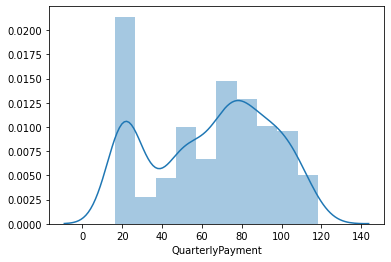

In [61]:
sns.distplot(dumt['QuarterlyPayment'])

<AxesSubplot:xlabel='GrandPayment'>

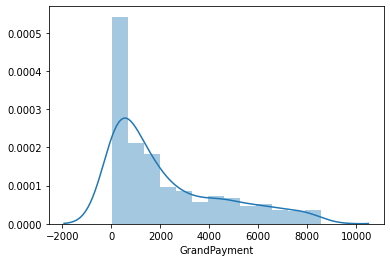

In [62]:
sns.distplot(dumt['GrandPayment'])

In [63]:
dum['CustomerAttrition'].dtypes

dtype('O')

In [64]:
Y=pd.get_dummies(dum['CustomerAttrition'],drop_first=True)
dum.drop(['ID','CustomerAttrition'],axis=1,inplace=True)

In [65]:
dumt.drop('ID',axis=1,inplace=True)

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dum, Y, test_size=0.2, random_state=0)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [68]:
lr=LogisticRegression(random_state=0) 
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

F:\anCONDA\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[822  99]
 [157 190]]
0.7981072555205048
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       921
           1       0.66      0.55      0.60       347

    accuracy                           0.80      1268
   macro avg       0.75      0.72      0.73      1268
weighted avg       0.79      0.80      0.79      1268



F:\anCONDA\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [69]:
clasn=GaussianNB() 
clasn.fit(X_train, y_train)
y_predn=clasn.predict(X_test)
print(confusion_matrix(y_test,y_predn)) 
print(accuracy_score(y_test,y_predn))
print(classification_report(y_test,y_predn))


[[656 265]
 [101 246]]
0.7113564668769716
              precision    recall  f1-score   support

           0       0.87      0.71      0.78       921
           1       0.48      0.71      0.57       347

    accuracy                           0.71      1268
   macro avg       0.67      0.71      0.68      1268
weighted avg       0.76      0.71      0.72      1268



F:\anCONDA\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [70]:
dt= DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train) 
y_predd=dt.predict(X_test)
print(confusion_matrix(y_test,y_predd))
print(accuracy_score(y_test,y_predd))
print(classification_report(y_test,y_predd))

[[727 194]
 [163 184]]
0.7184542586750788
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       921
           1       0.49      0.53      0.51       347

    accuracy                           0.72      1268
   macro avg       0.65      0.66      0.66      1268
weighted avg       0.73      0.72      0.72      1268



In [71]:
rf=RandomForestClassifier(random_state=0,class_weight='balanced')
rf.fit(X_train,y_train)
y_predr=rf.predict(X_test)
print(confusion_matrix(y_test,y_predr)) 
print(accuracy_score(y_test,y_predr)) 
print(classification_report(y_test,y_predr))

F:\anCONDA\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[835  86]
 [188 159]]
0.7839116719242902
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       921
           1       0.65      0.46      0.54       347

    accuracy                           0.78      1268
   macro avg       0.73      0.68      0.70      1268
weighted avg       0.77      0.78      0.77      1268



In [72]:
classifier = XGBClassifier(random_state=0) 
classifier.fit(X_train,y_train)
y_predx = classifier.predict(X_test)
print(confusion_matrix(y_test,y_predx)) 
print(accuracy_score(y_test,y_predx)) 
print(classification_report(y_test,y_predx))

F:\anCONDA\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[827  94]
 [155 192]]
0.8036277602523659
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       921
           1       0.67      0.55      0.61       347

    accuracy                           0.80      1268
   macro avg       0.76      0.73      0.74      1268
weighted avg       0.80      0.80      0.80      1268



In [73]:
dum.head()

,ServiceSpan,QuarterlyPayment,GrandPayment,isneg,0-13,13-28,28-43,43-58,58-73,sex_Male,Aged_Yes,Married_Yes,TotalDependents_Yes,MobileService_Yes,4GService_Satellite Broadband,4GService_Wifi Broadband,CyberProtection_Yes,HardwareSupport_Yes,TechnicalAssistance_Yes,FilmSubscription_Yes,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic,div,div_0-20
0,48,96.259802,4628.129119,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1,0,0,1,0,48.079562,0
1,45,18.876470,922.085998,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,48.848434,0
2,59,106.016057,6205.891129,0,0,0,0,0,1,1,1,1,0,1,0,1,1,0,1,0,1,0,0,58.537275,0
3,14,80.108839,1248.655391,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,15.586987,1
4,25,51.529773,1285.321277,0,0,1,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,24.943274,0


In [74]:
df.head(20)

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition,isneg,0-13,13-28,28-43,43-58,58-73
0,B60LHTZLLPFU4IULNPUF,Female,No,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes,0,0,0,0,1,0
1,1RUJ7ONYZHYTWKOKO1SD,Male,No,Yes,No,45,Yes,Wifi Broadband,No,No,No,Yes,Bank,18.876470,922.085998,No,0,0,0,0,1,0
2,DZ9EEOQWSN0MYCBUPAM5,Male,Yes,Yes,No,59,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129,Yes,0,0,0,0,0,1
3,YZ43L1UQUQACTL1PXXZG,Male,No,No,No,14,Yes,Wifi Broadband,No,No,No,No,Check,80.108839,1248.655391,No,0,0,1,0,0,0
4,6P28152QGF60PDLSCB9M,Female,No,Yes,Yes,25,Yes,Wifi Broadband,No,Yes,No,Yes,Check,51.529773,1285.321277,No,0,0,1,0,0,0
5,60DE6HXH6KQRETDXAHLK,Male,No,Yes,Yes,27,Yes,Satellite Broadband,Yes,No,No,Yes,Card,96.384275,2650.779905,Yes,0,0,1,0,0,0
6,7GOZ81H8YZXQ3YPMZEB0,Male,Yes,Yes,No,53,Yes,Wifi Broadband,No,No,No,No,Check,17.291325,1032.254126,No,0,0,0,0,1,0
7,LTKNFUXFICQI8MSX5RWI,Female,Yes,No,Yes,0,Yes,Wifi Broadband,No,No,No,No,Electronic,70.062808,70.934345,Yes,0,1,0,0,0,0
8,RWYOSHJ90GB50Q93G877,Male,No,No,No,1,Yes,Wifi Broadband,No,No,No,No,Electronic,70.113661,134.880429,No,0,1,0,0,0,0
9,4MH18O0I7LEW5BRRITY3,Female,No,No,No,46,Yes,Wifi Broadband,Yes,Yes,Yes,No,Card,112.740780,5032.993657,No,0,0,0,0,1,0


In [75]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
scaler1=StandardScaler()
X_test=scaler1.fit_transform(X_test)

scaler2=StandardScaler()
dum=scaler2.fit_transform(dum)
scaler3=StandardScaler()
dumt=scaler3.fit_transform(dumt)

In [76]:
lr2=LogisticRegression(random_state=0,C=100,penalty='l2',solver='liblinear') 

lr2.fit(dum,Y)

y_predl2 = lr2.predict(dumt)
basicl1=dft['ID']
basicl1=pd.DataFrame(basicl1) 
basicl1['CustomerAttrition']=y_predl2
basicl1['CustomerAttrition'].replace([1,0],['Yes','No'],inplace=True)
basicl1.head()

lr1=LogisticRegression(random_state=0,C=100,penalty='l2',solver='liblinear') 
lr1.fit(X_train,y_train)
y_pred=lr1.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

###LR1 = LogisticRegression(random_state=0)
##grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
LR1_search = GridSearchCV(LR1, param_grid=grid,verbose = 3, cv=10)

# fitting the model for grid search 
LR1_search.fit(X_train , y_train)

In [77]:
df.head()

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition,isneg,0-13,13-28,28-43,43-58,58-73
0,B60LHTZLLPFU4IULNPUF,Female,No,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes,0,0,0,0,1,0
1,1RUJ7ONYZHYTWKOKO1SD,Male,No,Yes,No,45,Yes,Wifi Broadband,No,No,No,Yes,Bank,18.876470,922.085998,No,0,0,0,0,1,0
2,DZ9EEOQWSN0MYCBUPAM5,Male,Yes,Yes,No,59,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129,Yes,0,0,0,0,0,1
3,YZ43L1UQUQACTL1PXXZG,Male,No,No,No,14,Yes,Wifi Broadband,No,No,No,No,Check,80.108839,1248.655391,No,0,0,1,0,0,0
4,6P28152QGF60PDLSCB9M,Female,No,Yes,Yes,25,Yes,Wifi Broadband,No,Yes,No,Yes,Check,51.529773,1285.321277,No,0,0,1,0,0,0


In [78]:
df.groupby('MobileService')['4GService'].value_counts()

MobileService  4GService          
No             Wifi Broadband          245
               Satellite Broadband     203
               No                      118
Yes            Wifi Broadband         2549
               Satellite Broadband    1974
               No                     1249
Name: 4GService, dtype: int64

In [79]:
df.groupby('CustomerAttrition')['GrandPayment'].mean()

CustomerAttrition
No     2558.720051
Yes    1548.591039
Name: GrandPayment, dtype: float64

In [80]:
df['CustomerAttrition'].value_counts()

No     4658
Yes    1680
Name: CustomerAttrition, dtype: int64

In [81]:
dum.loc[:,['ServiceSpan','div']]

,ServiceSpan,div
0,48,48.079562
1,45,48.848434
2,59,58.537275
3,14,15.586987
4,25,24.943274
...,...,...
6333,3,4.401908
6334,-1,1.011746
6335,18,15.363245
6336,46,48.160285


In [82]:
df[df['ServiceSpan']<0]

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition,isneg,0-13,13-28,28-43,43-58,58-73
51,KNJ68L07G7UPL0O7GJ8T,Male,Yes,Yes,Yes,-1,Yes,No,No,No,Yes,Yes,Card,49.402192,49.384029,Yes,1,0,0,0,0,0
53,KO1YG3DMANI47G3AKHS2,Female,No,No,No,-1,Yes,Satellite Broadband,No,No,No,No,Check,25.009332,24.269131,Yes,1,0,0,0,0,0
74,MTF9YNB7X4BRUMUEHLAC,Female,No,No,No,-1,Yes,Wifi Broadband,No,No,No,No,Check,25.134435,23.873992,Yes,1,0,0,0,0,0
88,OBXM4R72JRWI4XS7JPM4,Female,No,No,No,-1,Yes,Wifi Broadband,No,Yes,No,Yes,Check,50.478363,51.118120,Yes,1,0,0,0,0,0
104,DTBQPG0EL72O3R5ERART,Female,Yes,No,No,-1,Yes,Wifi Broadband,No,No,No,No,Check,45.155888,44.946036,Yes,1,0,0,0,0,0
282,7I5KD0838JWKMZWQEHHI,Male,No,No,No,-1,Yes,No,No,No,No,Yes,Check,19.451265,19.993960,No,1,0,0,0,0,0
309,Y2ARPM4IAODPJQ64O4YE,Male,No,Yes,Yes,-1,Yes,Wifi Broadband,No,No,No,Yes,Check,20.009302,18.445153,Yes,1,0,0,0,0,0
323,OPQ8T889USXQO47SLDEH,Female,Yes,No,No,-1,Yes,Wifi Broadband,No,No,No,No,Electronic,70.626124,68.840483,Yes,1,0,0,0,0,0
394,J712NMX37BELSOEK0JDL,Female,Yes,No,No,-1,Yes,Satellite Broadband,No,No,No,No,Electronic,69.705756,69.801351,Yes,1,0,0,0,0,0
408,HKOGG57SE1H0NESU267N,Female,No,No,No,-1,Yes,No,No,No,No,Yes,Electronic,69.501256,71.325747,Yes,1,0,0,0,0,0


In [83]:
df.describe()

,ServiceSpan,QuarterlyPayment,GrandPayment,isneg,0-13,13-28,28-43,43-58,58-73
count,6338.000000,6338.000000,6328.000000,6338.000000,6338.000000,6338.00000,6338.000000,6338.000000,6338.000000
mean,31.946040,64.814490,2290.544207,0.021458,0.307352,0.16125,0.147681,0.139792,0.222468
std,24.559659,30.191091,2265.181098,0.144916,0.461433,0.36779,0.354811,0.346798,0.415936
min,-2.000000,16.504109,16.297961,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,8.000000,35.645524,401.849530,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,29.000000,70.534085,1407.589119,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,55.000000,90.058498,3823.855846,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
max,73.000000,120.159190,8685.848657,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [84]:
dft[dft['ServiceSpan']<0]

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,isneg,0-13,13-28,28-43,43-58,58-73
22,KEFTUS3K74LWKZT460TL,Female,No,No,No,-1,Yes,Satellite Broadband,No,No,No,Yes,Bank,45.874309,44.669805,1,0,0,0,0,0
30,6S29ZXQ2FORDD5R9BC5W,Male,No,No,No,-1,Yes,No,No,No,No,Yes,Electronic,95.010951,94.773915,1,0,0,0,0,0
132,SUET8U2XE8A6W51ZHRET,Female,Yes,No,No,-1,Yes,Satellite Broadband,No,No,No,No,Electronic,72.730099,70.348374,1,0,0,0,0,0
235,QYE8NF2MPINTDR51SDMH,Male,No,No,No,-1,Yes,No,No,No,No,No,Bank,70.778570,70.459502,1,0,0,0,0,0
237,N8T5M5KONO1H6TP6DDP6,Female,Yes,Yes,No,-1,Yes,Satellite Broadband,No,No,No,Yes,Electronic,74.208987,74.735395,1,0,0,0,0,0
252,7QSC25F2O8GBOXCE80P0,Female,No,Yes,No,-1,Yes,Wifi Broadband,No,No,No,No,Bank,75.394765,74.263461,1,0,0,0,0,0
334,B3RX7HCK0GC5WLR0LBSL,Female,No,No,No,-1,Yes,Satellite Broadband,No,No,No,No,Electronic,76.314014,75.453491,1,0,0,0,0,0
338,GXAXJ6XKUMSPQ2U2G6DE,Male,No,No,No,-1,Yes,No,No,No,No,Yes,Check,21.727663,21.415754,1,0,0,0,0,0
415,QYEKMH33MYF43SWPZQML,Male,No,No,Yes,-1,Yes,Satellite Broadband,No,No,No,Yes,Electronic,70.981944,73.768905,1,0,0,0,0,0
492,BRQKCZ1KE5IHDR9HEQQU,Female,No,No,No,-1,Yes,No,No,No,No,No,Check,19.658056,18.940342,1,0,0,0,0,0


In [85]:
dum.head()

,ServiceSpan,QuarterlyPayment,GrandPayment,isneg,0-13,13-28,28-43,43-58,58-73,sex_Male,Aged_Yes,Married_Yes,TotalDependents_Yes,MobileService_Yes,4GService_Satellite Broadband,4GService_Wifi Broadband,CyberProtection_Yes,HardwareSupport_Yes,TechnicalAssistance_Yes,FilmSubscription_Yes,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic,div,div_0-20
0,48,96.259802,4628.129119,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1,0,0,1,0,48.079562,0
1,45,18.876470,922.085998,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,48.848434,0
2,59,106.016057,6205.891129,0,0,0,0,0,1,1,1,1,0,1,0,1,1,0,1,0,1,0,0,58.537275,0
3,14,80.108839,1248.655391,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,15.586987,1
4,25,51.529773,1285.321277,0,0,1,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,24.943274,0


In [86]:
dum.describe()

,ServiceSpan,QuarterlyPayment,GrandPayment,isneg,0-13,13-28,28-43,43-58,58-73,sex_Male,Aged_Yes,Married_Yes,TotalDependents_Yes,MobileService_Yes,4GService_Satellite Broadband,4GService_Wifi Broadband,CyberProtection_Yes,HardwareSupport_Yes,TechnicalAssistance_Yes,FilmSubscription_Yes,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic,div,div_0-20
count,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.00000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000
mean,31.946040,64.814490,2288.785440,0.021458,0.307352,0.16125,0.147681,0.139792,0.222468,0.506942,0.162354,0.483591,0.300726,0.910697,0.343484,0.440833,0.288735,0.339697,0.288735,0.383402,0.214737,0.229252,0.336699,32.505100,0.402177
std,24.559659,30.191091,2264.413524,0.144916,0.461433,0.36779,0.354811,0.346798,0.415936,0.499991,0.368804,0.499770,0.458610,0.285203,0.474909,0.496526,0.453210,0.473644,0.453210,0.486253,0.410672,0.420385,0.472618,24.618990,0.490376
min,-2.000000,16.504109,16.297961,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.813676,0.000000
25%,8.000000,35.645524,400.017707,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.887217,0.000000
50%,29.000000,70.534085,1404.734022,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.114342,0.000000
75%,55.000000,90.058498,3810.390937,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,55.160963,1.000000
max,73.000000,120.159190,8685.848657,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,120.552488,1.000000


In [87]:
dum[dum['div']<1]

,ServiceSpan,QuarterlyPayment,GrandPayment,isneg,0-13,13-28,28-43,43-58,58-73,sex_Male,Aged_Yes,Married_Yes,TotalDependents_Yes,MobileService_Yes,4GService_Satellite Broadband,4GService_Wifi Broadband,CyberProtection_Yes,HardwareSupport_Yes,TechnicalAssistance_Yes,FilmSubscription_Yes,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic,div,div_0-20
40,0,21.985193,19.350136,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0.880144,1
41,2,19.412855,17.201961,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0.886112,1
50,2,90.966102,89.078035,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0.979244,1
51,-1,49.402192,49.384029,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,1,1,1,0,0,0.999632,1
53,-1,25.009332,24.269131,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0.970403,1
56,0,19.458536,18.533233,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0.952447,1
60,1,86.355809,85.178041,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0.986361,1
74,-1,25.134435,23.873992,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0.949852,1
104,-1,45.155888,44.946036,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0.995353,1
119,1,70.681841,69.052341,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0.976946,1


In [88]:
dum[dum['ServiceSpan']<0]

,ServiceSpan,QuarterlyPayment,GrandPayment,isneg,0-13,13-28,28-43,43-58,58-73,sex_Male,Aged_Yes,Married_Yes,TotalDependents_Yes,MobileService_Yes,4GService_Satellite Broadband,4GService_Wifi Broadband,CyberProtection_Yes,HardwareSupport_Yes,TechnicalAssistance_Yes,FilmSubscription_Yes,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic,div,div_0-20
51,-1,49.402192,49.384029,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,1,1,1,0,0,0.999632,1
53,-1,25.009332,24.269131,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0.970403,1
74,-1,25.134435,23.873992,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0.949852,1
88,-1,50.478363,51.118120,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1.012674,1
104,-1,45.155888,44.946036,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0.995353,1
282,-1,19.451265,19.993960,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1.027900,1
309,-1,20.009302,18.445153,1,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,1,0,1,0,0.921829,1
323,-1,70.626124,68.840483,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0.974717,1
394,-1,69.705756,69.801351,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,1.001371,1
408,-1,69.501256,71.325747,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1.026251,1


In [89]:
len(df['ID'][16])

20

In [90]:
df.head()

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition,isneg,0-13,13-28,28-43,43-58,58-73
0,B60LHTZLLPFU4IULNPUF,Female,No,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes,0,0,0,0,1,0
1,1RUJ7ONYZHYTWKOKO1SD,Male,No,Yes,No,45,Yes,Wifi Broadband,No,No,No,Yes,Bank,18.876470,922.085998,No,0,0,0,0,1,0
2,DZ9EEOQWSN0MYCBUPAM5,Male,Yes,Yes,No,59,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129,Yes,0,0,0,0,0,1
3,YZ43L1UQUQACTL1PXXZG,Male,No,No,No,14,Yes,Wifi Broadband,No,No,No,No,Check,80.108839,1248.655391,No,0,0,1,0,0,0
4,6P28152QGF60PDLSCB9M,Female,No,Yes,Yes,25,Yes,Wifi Broadband,No,Yes,No,Yes,Check,51.529773,1285.321277,No,0,0,1,0,0,0


In [91]:
df[df['CustomerAttrition']=='Yes']

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition,isneg,0-13,13-28,28-43,43-58,58-73
0,B60LHTZLLPFU4IULNPUF,Female,No,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes,0,0,0,0,1,0
2,DZ9EEOQWSN0MYCBUPAM5,Male,Yes,Yes,No,59,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129,Yes,0,0,0,0,0,1
5,60DE6HXH6KQRETDXAHLK,Male,No,Yes,Yes,27,Yes,Satellite Broadband,Yes,No,No,Yes,Card,96.384275,2650.779905,Yes,0,0,1,0,0,0
7,LTKNFUXFICQI8MSX5RWI,Female,Yes,No,Yes,0,Yes,Wifi Broadband,No,No,No,No,Electronic,70.062808,70.934345,Yes,0,1,0,0,0,0
17,S97UBE9BI0RA9YY0A5JL,Male,Yes,Yes,No,18,Yes,Satellite Broadband,No,Yes,No,No,Electronic,48.007007,810.815202,Yes,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6324,C64RSKPUGAEBJS40E41I,Male,Yes,No,No,10,Yes,Wifi Broadband,No,No,No,No,Electronic,72.746554,688.500615,Yes,0,1,0,0,0,0
6329,T0JPXNKO2KMCRM3HSS61,Male,No,Yes,No,71,Yes,Satellite Broadband,Yes,Yes,Yes,No,Bank,117.452530,8685.848657,Yes,0,0,0,0,0,1
6332,07HD9DL5IFEF06ADGZQJ,Male,No,No,No,2,Yes,No,No,No,No,Yes,Electronic,70.750293,69.094592,Yes,0,1,0,0,0,0
6333,Y7U717HO87PCW6XXIQA1,Female,Yes,No,No,3,Yes,Wifi Broadband,No,Yes,No,Yes,Card,100.391595,441.914530,Yes,0,1,0,0,0,0


In [92]:
df1=df.copy()

In [93]:
df1['ID'] = df1['ID'].str.replace(r'[^\d.]+', '')

In [94]:
df1.head(20)

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition,isneg,0-13,13-28,28-43,43-58,58-73
0,604,Female,No,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes,0,0,0,0,1,0
1,171,Male,No,Yes,No,45,Yes,Wifi Broadband,No,No,No,Yes,Bank,18.876470,922.085998,No,0,0,0,0,1,0
2,905,Male,Yes,Yes,No,59,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129,Yes,0,0,0,0,0,1
3,4311,Male,No,No,No,14,Yes,Wifi Broadband,No,No,No,No,Check,80.108839,1248.655391,No,0,0,1,0,0,0
4,628152609,Female,No,Yes,Yes,25,Yes,Wifi Broadband,No,Yes,No,Yes,Check,51.529773,1285.321277,No,0,0,1,0,0,0
5,6066,Male,No,Yes,Yes,27,Yes,Satellite Broadband,Yes,No,No,Yes,Card,96.384275,2650.779905,Yes,0,0,1,0,0,0
6,781830,Male,Yes,Yes,No,53,Yes,Wifi Broadband,No,No,No,No,Check,17.291325,1032.254126,No,0,0,0,0,1,0
7,85,Female,Yes,No,Yes,0,Yes,Wifi Broadband,No,No,No,No,Electronic,70.062808,70.934345,Yes,0,1,0,0,0,0
8,905093877,Male,No,No,No,1,Yes,Wifi Broadband,No,No,No,No,Electronic,70.113661,134.880429,No,0,1,0,0,0,0
9,4180753,Female,No,No,No,46,Yes,Wifi Broadband,Yes,Yes,Yes,No,Card,112.740780,5032.993657,No,0,0,0,0,1,0


In [95]:
df1[df1['CustomerAttrition']=='Yes']

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition,isneg,0-13,13-28,28-43,43-58,58-73
0,604,Female,No,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes,0,0,0,0,1,0
2,905,Male,Yes,Yes,No,59,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129,Yes,0,0,0,0,0,1
5,6066,Male,No,Yes,Yes,27,Yes,Satellite Broadband,Yes,No,No,Yes,Card,96.384275,2650.779905,Yes,0,0,1,0,0,0
7,85,Female,Yes,No,Yes,0,Yes,Wifi Broadband,No,No,No,No,Electronic,70.062808,70.934345,Yes,0,1,0,0,0,0
17,9790905,Male,Yes,Yes,No,18,Yes,Satellite Broadband,No,Yes,No,No,Electronic,48.007007,810.815202,Yes,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6324,644041,Male,Yes,No,No,10,Yes,Wifi Broadband,No,No,No,No,Electronic,72.746554,688.500615,Yes,0,1,0,0,0,0
6329,02361,Male,No,Yes,No,71,Yes,Satellite Broadband,Yes,Yes,Yes,No,Bank,117.452530,8685.848657,Yes,0,0,0,0,0,1
6332,079506,Male,No,No,No,2,Yes,No,No,No,No,Yes,Electronic,70.750293,69.094592,Yes,0,1,0,0,0,0
6333,77178761,Female,Yes,No,No,3,Yes,Wifi Broadband,No,Yes,No,Yes,Card,100.391595,441.914530,Yes,0,1,0,0,0,0


scaler4=StandardScaler()
dumc=scaler4.fit_transform(dumc)
scaler5=StandardScaler() 
dumtc=scaler5.fit_transform(dumtc)

In [96]:
dum.describe()

,ServiceSpan,QuarterlyPayment,GrandPayment,isneg,0-13,13-28,28-43,43-58,58-73,sex_Male,Aged_Yes,Married_Yes,TotalDependents_Yes,MobileService_Yes,4GService_Satellite Broadband,4GService_Wifi Broadband,CyberProtection_Yes,HardwareSupport_Yes,TechnicalAssistance_Yes,FilmSubscription_Yes,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic,div,div_0-20
count,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.00000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000
mean,31.946040,64.814490,2288.785440,0.021458,0.307352,0.16125,0.147681,0.139792,0.222468,0.506942,0.162354,0.483591,0.300726,0.910697,0.343484,0.440833,0.288735,0.339697,0.288735,0.383402,0.214737,0.229252,0.336699,32.505100,0.402177
std,24.559659,30.191091,2264.413524,0.144916,0.461433,0.36779,0.354811,0.346798,0.415936,0.499991,0.368804,0.499770,0.458610,0.285203,0.474909,0.496526,0.453210,0.473644,0.453210,0.486253,0.410672,0.420385,0.472618,24.618990,0.490376
min,-2.000000,16.504109,16.297961,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.813676,0.000000
25%,8.000000,35.645524,400.017707,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.887217,0.000000
50%,29.000000,70.534085,1404.734022,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.114342,0.000000
75%,55.000000,90.058498,3810.390937,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,55.160963,1.000000
max,73.000000,120.159190,8685.848657,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,120.552488,1.000000


classifier1 = XGBClassifier(random_state=0)
classifier1.fit(dum,Y)
y_predx1 = classifier.predict(dumt)
basicn=dft['ID']
basicn=pd.DataFrame(basicn) 
basicn['CustomerAttrition']=y_predx1
basicn['CustomerAttrition'].replace([1,0],['Yes','No'],inplace=True)
basicn.to_csv('kgp13.csv',index=False)

In [97]:
dum.head()

,ServiceSpan,QuarterlyPayment,GrandPayment,isneg,0-13,13-28,28-43,43-58,58-73,sex_Male,Aged_Yes,Married_Yes,TotalDependents_Yes,MobileService_Yes,4GService_Satellite Broadband,4GService_Wifi Broadband,CyberProtection_Yes,HardwareSupport_Yes,TechnicalAssistance_Yes,FilmSubscription_Yes,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic,div,div_0-20
0,48,96.259802,4628.129119,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1,0,0,1,0,48.079562,0
1,45,18.876470,922.085998,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,48.848434,0
2,59,106.016057,6205.891129,0,0,0,0,0,1,1,1,1,0,1,0,1,1,0,1,0,1,0,0,58.537275,0
3,14,80.108839,1248.655391,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,15.586987,1
4,25,51.529773,1285.321277,0,0,1,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,24.943274,0


In [98]:
dumt.head()

,ServiceSpan,QuarterlyPayment,GrandPayment,isneg,0-13,13-28,28-43,43-58,58-73,sex_Male,Aged_Yes,Married_Yes,TotalDependents_Yes,MobileService_Yes,4GService_Satellite Broadband,4GService_Wifi Broadband,CyberProtection_Yes,HardwareSupport_Yes,TechnicalAssistance_Yes,FilmSubscription_Yes,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic,div,div_0-20
0,8,21.299937,151.092519,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,7.093567,1
1,26,56.609623,1553.276979,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,27.438391,0
2,66,25.167690,1684.262416,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,66.921613,0
3,31,55.560968,1829.874462,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,32.934532,0
4,21,20.070002,489.818170,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,24.405487,0


In [99]:
classifier1 = XGBClassifier(random_state=0)
classifier1.fit(dum,Y)
y_predx1 = classifier.predict(dumt)
basicn=dft['ID'] 
basicn=pd.DataFrame(basicn) 
basicn['CustomerAttrition']=y_predx1
basicn['CustomerAttrition'].replace([1,0],['Yes','No'],inplace=True)
basicn.to_csv('kgp13.csv',index=False)

F:\anCONDA\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [100]:
dumc=dum.copy()
dumtc=dumt.copy()

In [101]:
scaler4=StandardScaler()
dumc=scaler4.fit_transform(dumc)
scaler5=StandardScaler() 
dumtc=scaler5.fit_transform(dumtc)

In [102]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(dumc, Y, test_size=0.2, random_state=0)

In [103]:
classifier = XGBClassifier(random_state=0) 
classifier.fit(X_train1,y_train1)
y_predx = classifier.predict(X_test1)
print(confusion_matrix(y_test1,y_predx)) 
print(accuracy_score(y_test,y_predx)) 
print(classification_report(y_test1,y_predx))

F:\anCONDA\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[827  94]
 [155 192]]
0.8036277602523659
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       921
           1       0.67      0.55      0.61       347

    accuracy                           0.80      1268
   macro avg       0.76      0.73      0.74      1268
weighted avg       0.80      0.80      0.80      1268



In [104]:
from sklearn.model_selection import RandomizedSearchCV

In [105]:
param_grid = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100,300,500,700]}

In [106]:
classifierh = XGBClassifier(random_state=0)

In [107]:
xgb = RandomizedSearchCV(estimator = classifierh, param_distributions = param_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=0, n_jobs = 1)

In [108]:
lr=LogisticRegression(random_state=0) 
lr.fit(X_train1,y_train1)
y_pred=lr.predict(X_test1)
print(confusion_matrix(y_test1,y_pred))
print(accuracy_score(y_test1,y_pred)) 
print(classification_report(y_test1,y_pred))

[[826  95]
 [164 183]]
0.7957413249211357
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       921
           1       0.66      0.53      0.59       347

    accuracy                           0.80      1268
   macro avg       0.75      0.71      0.73      1268
weighted avg       0.79      0.80      0.79      1268



F:\anCONDA\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


xgb.fit(X_train,y_train)

y_predrh=xgb.predict(X_test)
print(confusion_matrix(y_test,y_predrh))
print(accuracy_score(y_test,y_predrh))
print(classification_report(y_test,y_predrh))

In [109]:
df.head()

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition,isneg,0-13,13-28,28-43,43-58,58-73
0,B60LHTZLLPFU4IULNPUF,Female,No,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes,0,0,0,0,1,0
1,1RUJ7ONYZHYTWKOKO1SD,Male,No,Yes,No,45,Yes,Wifi Broadband,No,No,No,Yes,Bank,18.876470,922.085998,No,0,0,0,0,1,0
2,DZ9EEOQWSN0MYCBUPAM5,Male,Yes,Yes,No,59,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129,Yes,0,0,0,0,0,1
3,YZ43L1UQUQACTL1PXXZG,Male,No,No,No,14,Yes,Wifi Broadband,No,No,No,No,Check,80.108839,1248.655391,No,0,0,1,0,0,0
4,6P28152QGF60PDLSCB9M,Female,No,Yes,Yes,25,Yes,Wifi Broadband,No,Yes,No,Yes,Check,51.529773,1285.321277,No,0,0,1,0,0,0


In [110]:
df.groupby(['CyberProtection','HardwareSupport','TechnicalAssistance'])['CustomerAttrition'].value_counts()

CyberProtection  HardwareSupport  TechnicalAssistance  CustomerAttrition
No               No               No                   No                   2017
                                                       Yes                   928
                                  Yes                  No                    302
                                                       Yes                   104
                 Yes              No                   No                    427
                                                       Yes                   291
                                  Yes                  No                    353
                                                       Yes                    86
Yes              No               No                   No                    358
                                                       Yes                   126
                                  Yes                  No                    308
                                    

In [111]:
dum['allno']=np.where((df['CyberProtection']=='No') & (df['TechnicalAssistance']=='No') & (df['HardwareSupport']=='No'),1,0)

In [112]:
dum.head()

,ServiceSpan,QuarterlyPayment,GrandPayment,isneg,0-13,13-28,28-43,43-58,58-73,sex_Male,Aged_Yes,Married_Yes,TotalDependents_Yes,MobileService_Yes,4GService_Satellite Broadband,4GService_Wifi Broadband,CyberProtection_Yes,HardwareSupport_Yes,TechnicalAssistance_Yes,FilmSubscription_Yes,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic,div,div_0-20,allno
0,48,96.259802,4628.129119,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1,0,0,1,0,48.079562,0,0
1,45,18.876470,922.085998,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,48.848434,0,1
2,59,106.016057,6205.891129,0,0,0,0,0,1,1,1,1,0,1,0,1,1,0,1,0,1,0,0,58.537275,0,0
3,14,80.108839,1248.655391,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,15.586987,1,1
4,25,51.529773,1285.321277,0,0,1,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,24.943274,0,0


In [113]:
dum['allno'].value_counts()

0    3393
1    2945
Name: allno, dtype: int64

In [114]:
df.groupby('sex')['TotalDependents'].value_counts()

sex     TotalDependents
Female  No                 2214
        Yes                 911
Male    No                 2218
        Yes                 995
Name: TotalDependents, dtype: int64

In [115]:
df.groupby('Married')['TotalDependents'].value_counts()

Married  TotalDependents
No       No                 2950
         Yes                 323
Yes      Yes                1583
         No                 1482
Name: TotalDependents, dtype: int64

In [116]:
df.groupby(['Married','TotalDependents'])['CustomerAttrition'].value_counts()

Married  TotalDependents  CustomerAttrition
No       No               No                   1936
                          Yes                  1014
         Yes              No                    253
                          Yes                    70
Yes      No               No                   1113
                          Yes                   369
         Yes              No                   1356
                          Yes                   227
Name: CustomerAttrition, dtype: int64

In [117]:
df.groupby('Aged')['TotalDependents'].value_counts()

Aged  TotalDependents
No    No                 3487
      Yes                1822
Yes   No                  945
      Yes                  84
Name: TotalDependents, dtype: int64

In [118]:
df.groupby(['Aged','Married','TotalDependents'])['CustomerAttrition'].value_counts()

Aged  Married  TotalDependents  CustomerAttrition
No    No       No               No                   1678
                                Yes                   770
               Yes              No                    247
                                Yes                    68
      Yes      No               No                    828
                                Yes                   211
               Yes              No                   1298
                                Yes                   209
Yes   No       No               No                    258
                                Yes                   244
               Yes              No                      6
                                Yes                     2
      Yes      No               No                    285
                                Yes                   158
               Yes              No                     58
                                Yes                    18
Name: CustomerAttritio

In [119]:
df.groupby(['Married','TotalDependents'])['CustomerAttrition'].value_counts()

Married  TotalDependents  CustomerAttrition
No       No               No                   1936
                          Yes                  1014
         Yes              No                    253
                          Yes                    70
Yes      No               No                   1113
                          Yes                   369
         Yes              No                   1356
                          Yes                   227
Name: CustomerAttrition, dtype: int64

In [120]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(dum, Y, test_size=0.2, random_state=0)

In [121]:
classifier = XGBClassifier(random_state=0) 
classifier.fit(X_train1,y_train1)
y_predx1 = classifier.predict(X_test1)
print(confusion_matrix(y_test1,y_predx1)) 
print(accuracy_score(y_test1,y_predx1)) 
print(classification_report(y_test1,y_predx1))

F:\anCONDA\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[827  94]
 [155 192]]
0.8036277602523659
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       921
           1       0.67      0.55      0.61       347

    accuracy                           0.80      1268
   macro avg       0.76      0.73      0.74      1268
weighted avg       0.80      0.80      0.80      1268



In [122]:
dum['bothno']=np.where((df['Married']=='No') & (df['TotalDependents']),1,0)

In [123]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(dum, Y, test_size=0.2, random_state=0)

In [124]:
classifier = XGBClassifier(random_state=0) 
classifier.fit(X_train3,y_train3)
y_predx1 = classifier.predict(X_test3)
print(confusion_matrix(y_test3,y_predx1)) 
print(accuracy_score(y_test3,y_predx1)) 
print(classification_report(y_test3,y_predx1))

[[825  96]
 [155 192]]
0.8020504731861199
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       921
           1       0.67      0.55      0.60       347

    accuracy                           0.80      1268
   macro avg       0.75      0.72      0.74      1268
weighted avg       0.79      0.80      0.80      1268



In [125]:
dum.head()

,ServiceSpan,QuarterlyPayment,GrandPayment,isneg,0-13,13-28,28-43,43-58,58-73,sex_Male,Aged_Yes,Married_Yes,TotalDependents_Yes,MobileService_Yes,4GService_Satellite Broadband,4GService_Wifi Broadband,CyberProtection_Yes,HardwareSupport_Yes,TechnicalAssistance_Yes,FilmSubscription_Yes,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic,div,div_0-20,allno,bothno
0,48,96.259802,4628.129119,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1,0,0,1,0,48.079562,0,0,1
1,45,18.876470,922.085998,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,48.848434,0,1,0
2,59,106.016057,6205.891129,0,0,0,0,0,1,1,1,1,0,1,0,1,1,0,1,0,1,0,0,58.537275,0,0,0
3,14,80.108839,1248.655391,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,15.586987,1,1,1
4,25,51.529773,1285.321277,0,0,1,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,24.943274,0,0,0


In [126]:
dumc=dum.copy()

In [127]:
dumc.drop(['div','div_0-20'],axis=1,inplace=True)

In [128]:
dumc['less']=np.where(dumc['GrandPayment']<dumc['QuarterlyPayment'],1,0)

In [129]:
dumc.drop(['allno','bothno'],axis=1,inplace=True)

In [130]:
from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split(dumc, Y, test_size=0.2, random_state=0)

In [131]:
classifier = XGBClassifier(random_state=0) 
classifier.fit(X_train4,y_train4)
y_predx1 = classifier.predict(X_test4)
print(confusion_matrix(y_test4,y_predx1)) 
print(accuracy_score(y_test4,y_predx1)) 
print(classification_report(y_test4,y_predx1))

F:\anCONDA\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[830  91]
 [150 197]]
0.8099369085173501
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       921
           1       0.68      0.57      0.62       347

    accuracy                           0.81      1268
   macro avg       0.77      0.73      0.75      1268
weighted avg       0.80      0.81      0.80      1268



In [132]:
dumc1=dumc.copy()

In [133]:
dumc1['ID']=df['ID'].str.replace(r'[^\d.]+', '')

In [134]:
from sklearn.model_selection import train_test_split
X_train5, X_test5, y_train5, y_test5 = train_test_split(dumc1, Y, test_size=0.2, random_state=0)

In [135]:
dumc1[dumc1['ID'].str.len()>=5]

,ServiceSpan,QuarterlyPayment,GrandPayment,isneg,0-13,13-28,28-43,43-58,58-73,sex_Male,Aged_Yes,Married_Yes,TotalDependents_Yes,MobileService_Yes,4GService_Satellite Broadband,4GService_Wifi Broadband,CyberProtection_Yes,HardwareSupport_Yes,TechnicalAssistance_Yes,FilmSubscription_Yes,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic,less,ID
4,25,51.529773,1285.321277,0,0,1,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,0,628152609
6,53,17.291325,1032.254126,0,0,0,0,1,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,781830
8,1,70.113661,134.880429,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,905093877
9,46,112.740780,5032.993657,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,0,1,0,0,0,4180753
10,67,89.506325,6131.923004,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,1,0,0,0,0,66921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6330,12,20.668986,228.174491,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,34878
6331,51,66.113619,3363.942373,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1,0,0,0,07826
6332,2,70.750293,69.094592,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,079506
6333,3,100.391595,441.914530,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,77178761


In [136]:
len(dumc1['ID'][8])

9

In [137]:
dumc1['ID'][0].rsplit(maxsplit=len(dumc1['ID'][0])-1)

['604']

In [138]:
for i in range(0,6338):
    if len(dumc1['ID'][i])>5:
        dumc1['ID'][i]=dumc1['ID'][i][:5]

F:\anCONDA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [139]:
dumc1['ID']=pd.to_numeric(dumc1['ID'],errors='coerce')

In [140]:
dumc1['ID'].isnull().sum()

9

In [141]:
from sklearn.model_selection import train_test_split
X_train7, X_test7, y_train7, y_test7 = train_test_split(dumc1, Y, test_size=0.2, random_state=0)

In [142]:
classifier = XGBClassifier(random_state=0) 
classifier.fit(X_train7,y_train7)
y_predx1 = classifier.predict(X_test7)
print(confusion_matrix(y_test7,y_predx1)) 
print(accuracy_score(y_test7,y_predx1)) 
print(classification_report(y_test7,y_predx1))

F:\anCONDA\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[826  95]
 [152 195]]
0.805205047318612
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       921
           1       0.67      0.56      0.61       347

    accuracy                           0.81      1268
   macro avg       0.76      0.73      0.74      1268
weighted avg       0.80      0.81      0.80      1268



In [143]:
dumc1.dtypes

ServiceSpan                        int64
QuarterlyPayment                 float64
GrandPayment                     float64
isneg                              int32
0-13                               int64
13-28                              int64
28-43                              int64
43-58                              int64
58-73                              int64
sex_Male                           uint8
Aged_Yes                           uint8
Married_Yes                        uint8
TotalDependents_Yes                uint8
MobileService_Yes                  uint8
4GService_Satellite Broadband      uint8
4GService_Wifi Broadband           uint8
CyberProtection_Yes                uint8
HardwareSupport_Yes                uint8
TechnicalAssistance_Yes            uint8
FilmSubscription_Yes               uint8
SettlementProcess_Card             uint8
SettlementProcess_Check            uint8
SettlementProcess_Electronic       uint8
less                               int32
ID              

In [144]:
dumtc=dumt.copy()

In [145]:
dumtc.head()

,ServiceSpan,QuarterlyPayment,GrandPayment,isneg,0-13,13-28,28-43,43-58,58-73,sex_Male,Aged_Yes,Married_Yes,TotalDependents_Yes,MobileService_Yes,4GService_Satellite Broadband,4GService_Wifi Broadband,CyberProtection_Yes,HardwareSupport_Yes,TechnicalAssistance_Yes,FilmSubscription_Yes,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic,div,div_0-20
0,8,21.299937,151.092519,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,7.093567,1
1,26,56.609623,1553.276979,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,27.438391,0
2,66,25.167690,1684.262416,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,66.921613,0
3,31,55.560968,1829.874462,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,32.934532,0
4,21,20.070002,489.818170,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,24.405487,0


In [146]:
dumtc.drop(['div','div_0-20'],axis=1,inplace=True)

In [147]:
dumtc['less']=np.where(dumtc['GrandPayment']<dumtc['QuarterlyPayment'],1,0)

In [148]:
dumtc.shape


(705, 24)

In [149]:
dumc.shape

(6338, 24)

classifier2 = XGBClassifier(random_state=0)
classifier2.fit(dumc,Y)
y_predx2 = classifier2.predict(dumtc)
basicn1=dft['ID'] 
basicn1=pd.DataFrame(basicn1) 
basicn1['CustomerAttrition']=y_predx2
basicn1['CustomerAttrition'].replace([1,0],['Yes','No'],inplace=True)
basicn1.to_csv('kgp14.csv',index=False)

In [150]:
scaler7 = StandardScaler()
dumc = scaler7.fit_transform(dumc)
scaler8 = StandardScaler()
dumtc = scaler8.fit_transform(dumtc)

In [151]:
from sklearn.model_selection import train_test_split
X_train8, X_test8, y_train8, y_test8 = train_test_split(dumc, Y, test_size=0.2, random_state=0)

In [152]:
classifier = XGBClassifier(random_state=0) 
classifier.fit(X_train8,y_train8)
y_predx1 = classifier.predict(X_test8)
print(confusion_matrix(y_test8,y_predx1)) 
print(accuracy_score(y_test8,y_predx1)) 
print(classification_report(y_test8,y_predx1))

F:\anCONDA\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[830  91]
 [150 197]]
0.8099369085173501
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       921
           1       0.68      0.57      0.62       347

    accuracy                           0.81      1268
   macro avg       0.77      0.73      0.75      1268
weighted avg       0.80      0.81      0.80      1268



In [159]:
dum.head()

,ServiceSpan,QuarterlyPayment,GrandPayment,isneg,0-13,13-28,28-43,43-58,58-73,sex_Male,Aged_Yes,Married_Yes,TotalDependents_Yes,MobileService_Yes,4GService_Satellite Broadband,4GService_Wifi Broadband,CyberProtection_Yes,HardwareSupport_Yes,TechnicalAssistance_Yes,FilmSubscription_Yes,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic,div,div_0-20,allno,bothno
0,48,96.259802,4628.129119,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1,0,0,1,0,48.079562,0,0,1
1,45,18.876470,922.085998,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,48.848434,0,1,0
2,59,106.016057,6205.891129,0,0,0,0,0,1,1,1,1,0,1,0,1,1,0,1,0,1,0,0,58.537275,0,0,0
3,14,80.108839,1248.655391,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,15.586987,1,1,1
4,25,51.529773,1285.321277,0,0,1,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,24.943274,0,0,0


In [160]:
dum.drop(['allno','bothno'],axis=1,inplace=True)

In [161]:
dumt.head()

,ServiceSpan,QuarterlyPayment,GrandPayment,isneg,0-13,13-28,28-43,43-58,58-73,sex_Male,Aged_Yes,Married_Yes,TotalDependents_Yes,MobileService_Yes,4GService_Satellite Broadband,4GService_Wifi Broadband,CyberProtection_Yes,HardwareSupport_Yes,TechnicalAssistance_Yes,FilmSubscription_Yes,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic,div,div_0-20
0,8,21.299937,151.092519,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,7.093567,1
1,26,56.609623,1553.276979,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,27.438391,0
2,66,25.167690,1684.262416,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,66.921613,0
3,31,55.560968,1829.874462,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,32.934532,0
4,21,20.070002,489.818170,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,24.405487,0


In [162]:
dumc1.head()

,ServiceSpan,QuarterlyPayment,GrandPayment,isneg,0-13,13-28,28-43,43-58,58-73,sex_Male,Aged_Yes,Married_Yes,TotalDependents_Yes,MobileService_Yes,4GService_Satellite Broadband,4GService_Wifi Broadband,CyberProtection_Yes,HardwareSupport_Yes,TechnicalAssistance_Yes,FilmSubscription_Yes,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic,less,ID
0,48,96.259802,4628.129119,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1,0,0,1,0,0,604.0
1,45,18.876470,922.085998,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,171.0
2,59,106.016057,6205.891129,0,0,0,0,0,1,1,1,1,0,1,0,1,1,0,1,0,1,0,0,0,905.0
3,14,80.108839,1248.655391,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,4311.0
4,25,51.529773,1285.321277,0,0,1,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,0,62815.0


In [163]:
dum['ID']=dumc1['ID']

In [164]:
from sklearn.model_selection import train_test_split
X_train9, X_test9, y_train9, y_test9 = train_test_split(dum, Y, test_size=0.2, random_state=0)

In [165]:
classifier = XGBClassifier(random_state=0) 
classifier.fit(X_train9,y_train9)
y_predx1 = classifier.predict(X_test9)
print(confusion_matrix(y_test9,y_predx1)) 
print(accuracy_score(y_test9,y_predx1)) 
print(classification_report(y_test9,y_predx1))

F:\anCONDA\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[830  91]
 [161 186]]
0.8012618296529969
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       921
           1       0.67      0.54      0.60       347

    accuracy                           0.80      1268
   macro avg       0.75      0.72      0.73      1268
weighted avg       0.79      0.80      0.79      1268

